In [2]:
# Exercise 1
from math import sqrt
hand_measurements = [1.78, 1.75, 1.72, 1.74, 1.77]

def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v-mean)**2 for v in values) / len(values)
    return _variance

def std_dev(values):
    return sqrt(variance(values))

mean = sum(hand_measurements)/len(hand_measurements)
std = std_dev(hand_measurements)
print(mean) # prints 1.752
print(std)  # prints 0.02135415650406264

1.752
0.02135415650406264


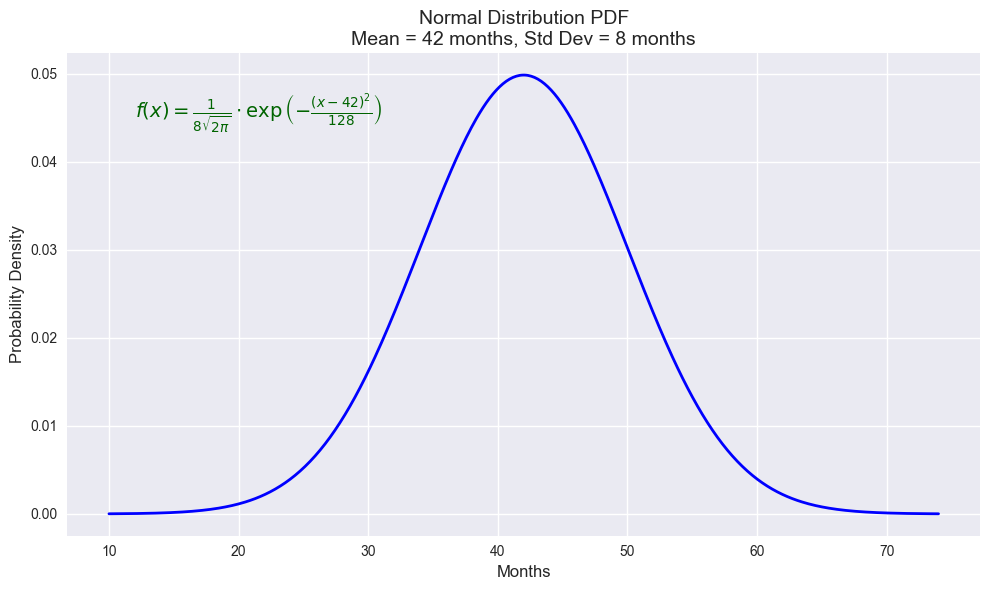

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean = 42
std_dev = 8

# Generate x values
x = np.linspace(10, 74, 500)
pdf = norm.pdf(x, mean, std_dev)

# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', linewidth=2)
plt.title('Normal Distribution PDF\nMean = 42 months, Std Dev = 8 months', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Add the correct PDF equation using LaTeX formatting
equation = r'$f(x) = \frac{1}{8 \sqrt{2\pi}} \cdot \exp\left(-\frac{(x - 42)^2}{128}\right)$'
plt.text(12, max(pdf)*0.9, equation, fontsize=14, color='darkgreen')

plt.grid(True)
plt.tight_layout()
plt.show()

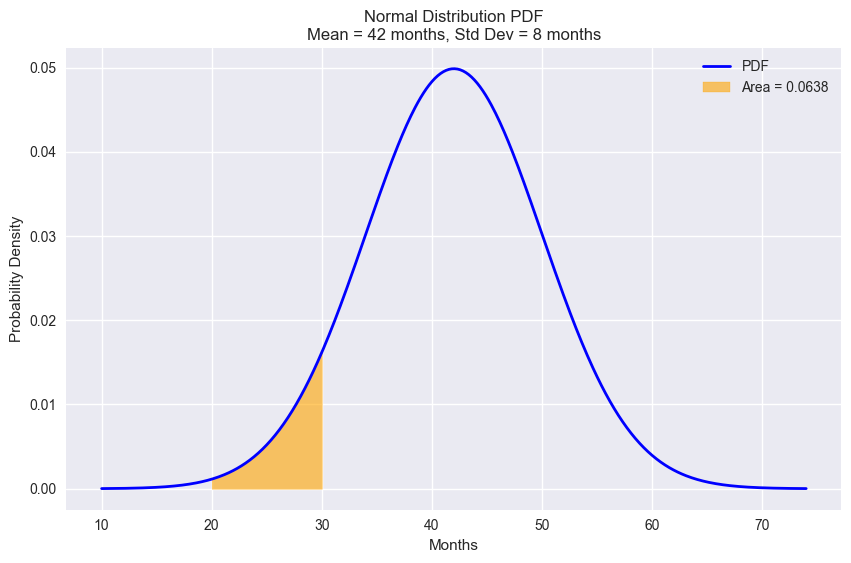

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean = 42
std_dev = 8

# Range for x-axis
x = np.linspace(10, 74, 500)
pdf = norm.pdf(x, mean, std_dev)

# Define the interval
lower_bound = 20
upper_bound = 30

# Calculate the shaded area using CDF
area = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', linewidth=2, label='PDF')

# Shade the area between 20 and 30 months
x_fill = np.linspace(lower_bound, upper_bound, 200)
y_fill = norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.6, label=f'Area = {area:.4f}')

# Labels and title
plt.title('Normal Distribution PDF\nMean = 42 months, Std Dev = 8 months')
plt.xlabel('Months')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

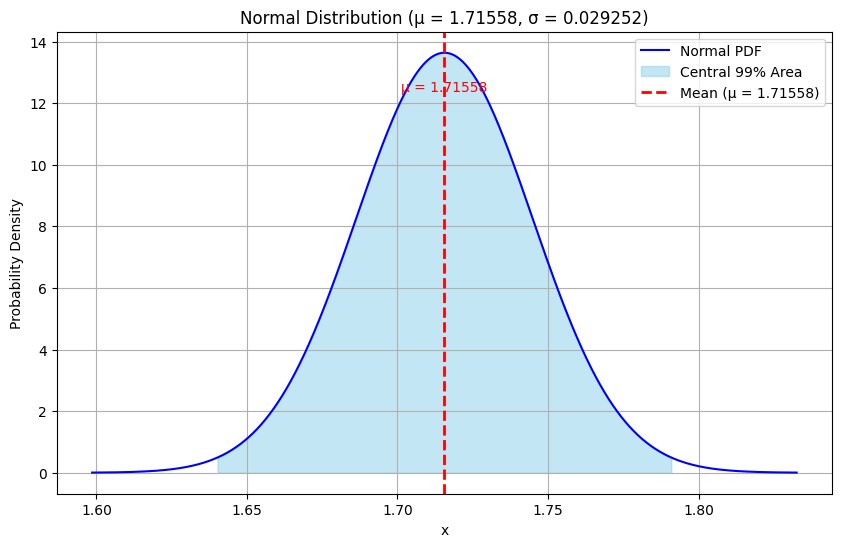

In [ ]:
# Exercise 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 1.71558
sigma = 0.029252

# Generate x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal PDF', color='blue')
plt.title('Normal Distribution (μ = 1.71558, σ = 0.029252)')
plt.xlabel('x')
plt.ylabel('Probability Density')

# Calculate bounds for central 99% probability
lower_bound = norm.ppf(0.005, mu, sigma)
upper_bound = norm.ppf(0.995, mu, sigma)

# Shade the central 99% area
x_fill = np.linspace(lower_bound, upper_bound, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5, label='Central 99% Area')

# Add vertical line at the mean
plt.axvline(mu, color='red', linestyle='--', linewidth=2, label='Mean (μ = {:.5f})'.format(mu))
plt.text(mu, max(pdf)*0.9, 'μ = {:.5f}'.format(mu), color='red', ha='center', va='bottom')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import norm
from math import sqrt

def critical_z_value(p):
  norm_dist = norm(loc=0.0, scale=1.0)
  left_tail_area = (1.0 - p)/2.0
  upper_area = 1.0 - ((1.0-p)/2.0)
  return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

def confidence_interval(p, sample_mean, sample_std, n):
  # Sample size must be greater than 30 
  lower, upper = critical_z_value(p)
  lower_ci = lower * (sample_std/sqrt(n))
  upper_ci = upper * (sample_std/sqrt(n))
  return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=.99, sample_mean=1.715588, sample_std=0.029252, n=34))

(1.7026658973748656, 1.7285101026251342)
